#**MUH. ROJIL ALHAMDI | H081201038**

##Penentuan Premi Asuransi Jiwa pada Data Survival PT Asuransi BRI Life Cabang Makassar menggunakan Cox Regression

# **Data Preparation**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/dataset/survival.csv')
df.head()

,joinage,gender,height,weight,smokingstatus,bmi,eventstatus,survtime
0,44,female,160,56,0,21.9,0,751
1,34,male,165,60,0,22.0,0,378
2,34,female,145,55,0,26.2,0,779
3,41,male,165,55,1,20.2,0,461
4,27,male,178,65,0,20.5,0,5854


# **Data Exploration and Cleaning**

In [ ]:
print(df.isnull().sum())

joinage          0
gender           0
height           0
weight           0
smokingstatus    0
bmi              0
eventstatus      0
survtime         0
dtype: int64


In [ ]:
df.describe()

,joinage,height,weight,smokingstatus,bmi,eventstatus,survtime
count,1000.000000,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.652000,160.0300,57.31000,0.050000,22.233400,0.021000,1928.078000
std,10.134575,8.9582,9.41608,0.218054,2.637901,0.143456,2003.078319
min,1.000000,79.0000,5.00000,0.000000,0.000000,0.000000,1.000000
25%,29.000000,155.0000,50.00000,0.000000,20.800000,0.000000,527.000000
50%,36.000000,160.0000,57.00000,0.000000,22.200000,0.000000,1183.000000
75%,43.000000,165.0000,63.00000,0.000000,23.700000,0.000000,2150.000000
max,58.000000,183.0000,90.00000,1.000000,38.800000,1.000000,8207.000000


In [ ]:
df['bmi'].value_counts()

20.8    47
22.0    41
19.5    34
21.5    32
23.4    30
        ..
17.4     1
27.8     1
38.8     1
27.2     1
1.8      1
Name: bmi, Length: 129, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['eventstatus'] = df['eventstatus'].astype(bool)
df['smokingstatus'] = df['smokingstatus'].astype(bool)

In [ ]:
result = df.groupby(['gender', 'eventstatus']).size().reset_index(name='count')
result

,gender,eventstatus,count
0,0,False,572
1,0,True,9
2,1,False,407
3,1,True,12


In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, float('inf')]
labels = ['<10', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']

In [ ]:
df['age_group'] = pd.cut(df['joinage'], bins=bins, labels=labels, right=False)

In [ ]:
result = df.groupby(['age_group', 'eventstatus']).size().reset_index(name='count')
result

,age_group,eventstatus,count
0,<10,False,13
1,<10,True,0
2,10-19,False,49
3,10-19,True,0
4,20-29,False,198
5,20-29,True,0
6,30-39,False,366
7,30-39,True,4
8,40-49,False,286
9,40-49,True,10


In [ ]:
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['<18.5', '18.5-24.9', '25-29.9', '30+']

In [ ]:
df['BMI_group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

In [ ]:
result = df.groupby(['BMI_group', 'eventstatus']).size().reset_index(name='count')
result

,BMI_group,eventstatus,count
0,<18.5,False,47
1,<18.5,True,0
2,18.5-24.9,False,814
3,18.5-24.9,True,18
4,25-29.9,False,114
5,25-29.9,True,3
6,30+,False,4
7,30+,True,0


In [ ]:
result = df.groupby(['smokingstatus', 'eventstatus']).size().reset_index(name='count')
result

,smokingstatus,eventstatus,count
0,False,False,932
1,False,True,18
2,True,False,47
3,True,True,3


In [ ]:
df.head()

,joinage,gender,height,weight,smokingstatus,bmi,eventstatus,survtime,age_group,BMI_group
0,44,0,160,56,False,21.9,False,751,40-49,18.5-24.9
1,34,1,165,60,False,22.0,False,378,30-39,18.5-24.9
2,34,0,145,55,False,26.2,False,779,30-39,25-29.9
3,41,1,165,55,True,20.2,False,461,40-49,18.5-24.9
4,27,1,178,65,False,20.5,False,5854,20-29,18.5-24.9


In [ ]:
atribut_yang_dihapus = ['height', 'weight', 'BMI_group', 'age_group']

# Membuat DataFrame baru tanpa atribut yang di-drop
df1 = df.drop(atribut_yang_dihapus, axis=1)
df1['gender'] = df1['gender'].astype(bool)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   joinage        1000 non-null   int64  
 1   gender         1000 non-null   bool   
 2   smokingstatus  1000 non-null   bool   
 3   bmi            1000 non-null   float64
 4   eventstatus    1000 non-null   bool   
 5   survtime       1000 non-null   int64  
dtypes: bool(3), float64(1), int64(2)
memory usage: 26.5 KB


In [ ]:
df1.describe()

,joinage,bmi,survtime
count,1000.000000,1000.000000,1000.000000
mean,35.652000,22.233400,1928.078000
std,10.134575,2.637901,2003.078319
min,1.000000,0.000000,1.000000
25%,29.000000,20.800000,527.000000
50%,36.000000,22.200000,1183.000000
75%,43.000000,23.700000,2150.000000
max,58.000000,38.800000,8207.000000


In [ ]:
df1.head()

,joinage,gender,smokingstatus,bmi,eventstatus,survtime
0,44,False,False,21.9,False,751
1,34,True,False,22.0,False,378
2,34,False,False,26.2,False,779
3,41,True,True,20.2,False,461
4,27,True,False,20.5,False,5854


In [ ]:
df['eventstatus'].value_counts()

False    979
True      21
Name: eventstatus, dtype: int64

# **Mulai Membangun Model Cox Regression**

In [ ]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 10.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=7ca4e429c5176c48b076d0bd26fe41e160d42e3d1e678f713f2cccc6afe8f9cd
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
pip install --upgrade lifelines

In [ ]:
correlation_matrix = df1.corr()
print(correlation_matrix)

                joinage    gender  smokingstatus       bmi  eventstatus  \
joinage        1.000000 -0.054261       0.056349  0.284129     0.164766   
gender        -0.054261  1.000000       0.270150  0.093326     0.045247   
smokingstatus  0.056349  0.270150       1.000000  0.017803     0.062400   
bmi            0.284129  0.093326       0.017803  1.000000     0.010048   
eventstatus    0.164766  0.045247       0.062400  0.010048     1.000000   
survtime      -0.056115  0.180457      -0.090025 -0.019251    -0.057470   

               survtime  
joinage       -0.056115  
gender         0.180457  
smokingstatus -0.090025  
bmi           -0.019251  
eventstatus   -0.057470  
survtime       1.000000  


##**UJI SIGNIFIKANSI VARIABEL**

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
# Membangun fungsi model
cox_model = CoxPHFitter()

# Mencocokkan model dengan data
cox_model.fit(df1, duration_col='survtime', event_col='eventstatus', formula='joinage + gender +	bmi +	smokingstatus')
pd.set_option('display.float_format', '{:.6f}'.format)

In [ ]:
cox_model.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 979 right-censored observations>
             duration col = 'survtime'
                event col = 'eventstatus'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 21
   partial log-likelihood = -108.08
         time fit was run = 2024-01-02 13:10:11 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
joinage         0.23       1.26       0.04             0.15             0.32                 1.16                 1.37
gender          0.37       1.45       0.49            -0.58             1.33                 0.56                 3.77
bmi            -0.13       0.88       0.10            -0.32             0.06                 0.73                 1.07
smokingstatus   1.70       5.50       0.70             0.33             3.08                 1.38                21.85

                cmp to     z      p   -log2(p)
covariate                                     
joinage           0.00  5.42 <0.005      24.02
gender            0.00  0.77   0.44       1.18
bmi               0.00 -1.30   0.19       2.37
smokingstatus     0.00  2.42   0.02       6.02
---
Concordance = 0.87
Partial AIC = 224.15
log-likelihood ratio test = 49.79 on 4 df
-log2(p) of ll-ratio test = 31.22

In [ ]:
log_likelihood_with_covariate = cox_model.log_likelihood_
print("Log-likelihood with covariate:", log_likelihood_with_covariate)

Log-likelihood with covariate: -108.07727831753562


In [ ]:
lr=cox_model.log_likelihood_ratio_test()
uji_statistik = lr.test_statistic
p_value = lr.p_value
minus_log2_p_value = -np.log2(lr.p_value)

print("Uji Statistik:", uji_statistik)
print("P-Value:", p_value)
print("-Log2(P-Value):", minus_log2_p_value)

Uji Statistik: 49.787113751074344
P-Value: 3.9999754471009407e-10
-Log2(P-Value): 31.219289804487232


In [ ]:
lr

<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 4
        test_name = log-likelihood ratio test

---
 test_statistic      p  -log2(p)
          49.79 <0.005     31.22

In [ ]:
events = df['eventstatus'].astype(bool)
print(df.loc[events, 'smokingstatus'].var())
print(df.loc[~events, 'smokingstatus'].var())

0.12857142857142856
0.04575011854256356


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   joinage        1000 non-null   int64  
 1   gender         1000 non-null   bool   
 2   smokingstatus  1000 non-null   bool   
 3   bmi            1000 non-null   float64
 4   eventstatus    1000 non-null   bool   
 5   survtime       1000 non-null   int64  
dtypes: bool(3), float64(1), int64(2)
memory usage: 26.5 KB


##**UJI ASUMSI PROPORTIONAL HAZARD**

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

cph = CoxPHFitter()
cph.fit(df1, duration_col='survtime', event_col='eventstatus')

schoenfeld_residuals = cph.compute_residuals(df1, kind='schoenfeld')

df1['ranked_failure'] = range(1, len(df1) + 1)

# Uji goodness-of-fit
test_results = proportional_hazard_test(cph, df1, time_transform='rank')

print("Hasil Uji Goodness-of-Fit:")
test_results.summary['p']

Hasil Uji Goodness-of-Fit:


bmi              0.609044
gender           0.190427
joinage          0.185863
ranked_failure   0.103826
smokingstatus    0.039141
Name: p, dtype: float64


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


[[<Axes: xlabel='rank-transformed time\n(p=0.1859)'>,
  <Axes: xlabel='km-transformed time\n(p=0.4934)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.1904)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1748)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0391)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1926)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.6090)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8430)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.1038)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0804)'>]]

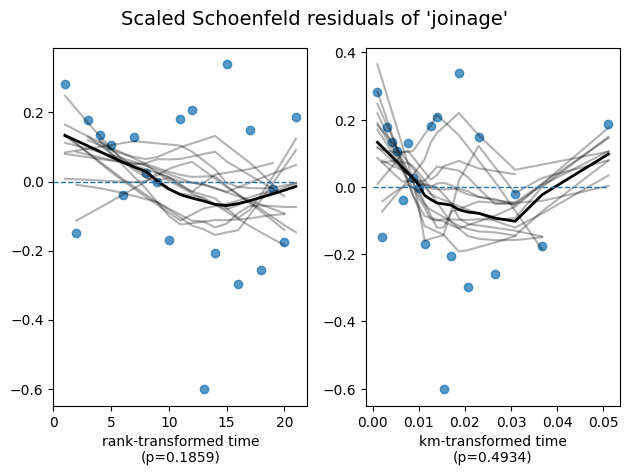

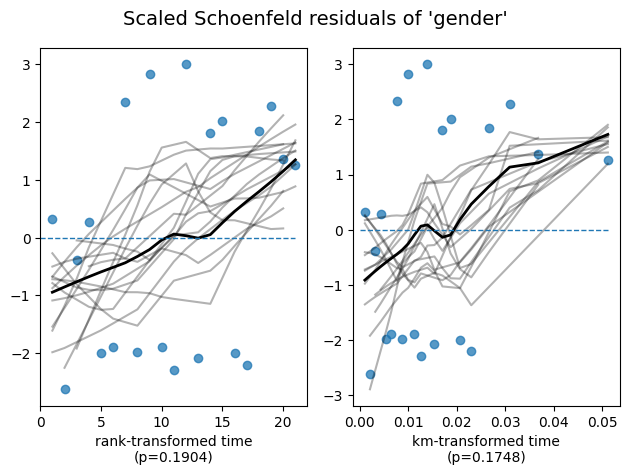

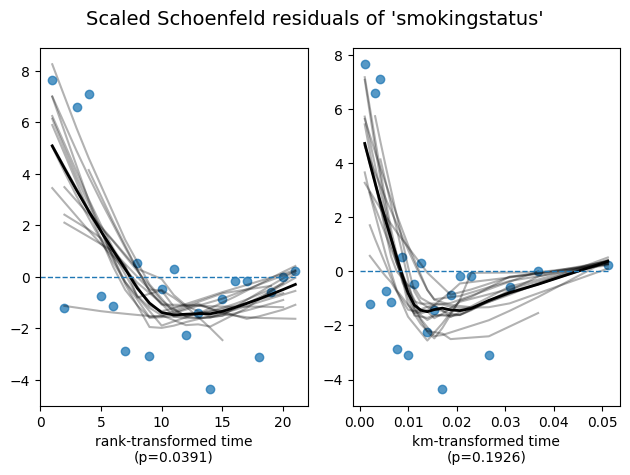

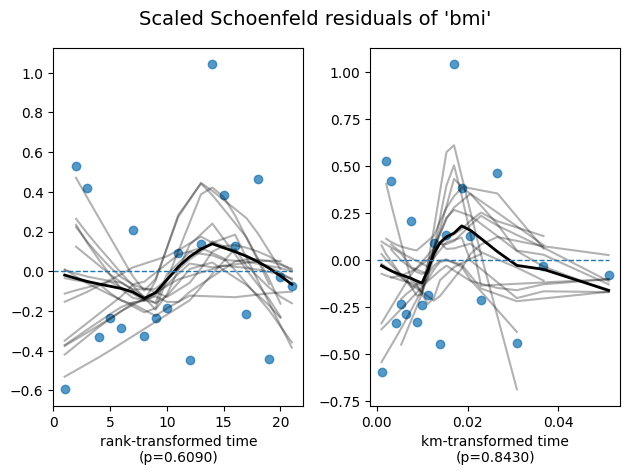

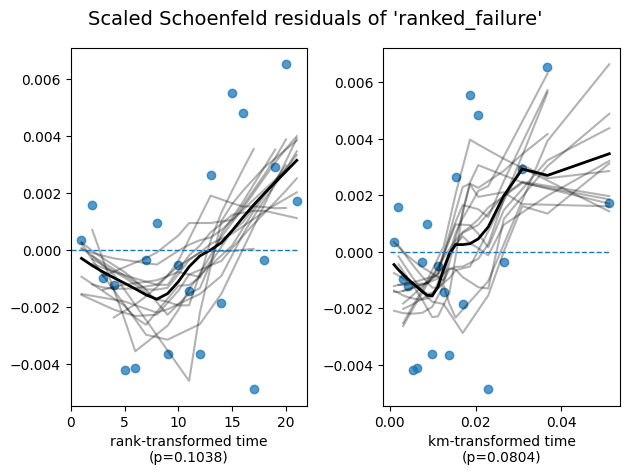

In [ ]:
cph.check_assumptions(df1, p_value_threshold=0.01, show_plots=True)

In [ ]:
print(cox_model.print_summary())

<lifelines.CoxPHFitter: fitted with 1000 total observations, 979 right-censored observations>
             duration col = 'survtime'
                event col = 'eventstatus'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 21
   partial log-likelihood = -108.08
         time fit was run = 2024-01-02 13:10:11 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
joinage         0.23       1.26       0.04             0.15             0.32                 1.16                 1.37
gender          0.37       1.45       0.49            -0.58             1.33                 0.56                 3.77
bmi            -0.13       0.88       0.10            -0.32             0.06                 0.73                 1.07
smokingstatus   1.70       5.50       0.70             0.33             3.08                 1.38                21.85

                cmp to     z      p   -log2(p)
covariate                                     
joinage           0.00  5.42 <0.005      24.02
gender            0.00  0.77   0.44       1.18
bmi               0.00 -1.30   0.19       2.37
smokingstatus     0.00  2.42   0.02       6.02
---
Concordance = 0.87
Partial AIC = 224.15
log-likelihood ratio test = 49.79 on 4 df
-log2(p) of ll-ratio test = 31.22

None


In [ ]:
summary = cox_model.summary

wald_test = summary["z"]

print(wald_test)

covariate
joinage          5.421908
gender           0.767761
bmi             -1.301900
smokingstatus    2.421808
Name: z, dtype: float64


In [ ]:
st_err = summary['se(coef)']
print(st_err)

covariate
joinage         0.043036
gender          0.486186
bmi             0.097325
smokingstatus   0.703852
Name: se(coef), dtype: float64


In [ ]:
p_values = summary['p']

# Display the p-values
print(p_values)

covariate
joinage         0.000000
gender          0.442629
bmi             0.192951
smokingstatus   0.015444
Name: p, dtype: float64


In [ ]:
coeff=summary["coef"]
print(coeff)

covariate
joinage          0.233338
gender           0.373275
bmi             -0.126707
smokingstatus    1.704594
Name: coef, dtype: float64


In [ ]:
significant_coef = cox_model.summary['coef']
subset_coef = significant_coef[['joinage', 'smokingstatus']]
print(subset_coef)

covariate
joinage         0.233338
smokingstatus   1.704594
Name: coef, dtype: float64


##**MODEL AKHIR *COX REGRESSION***

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter

# Assuming df is your DataFrame with columns "survtime," "eventstatus," "joinage," and "smokingstatus"
cph = CoxPHFitter()
cph.fit(df1, duration_col='survtime', event_col='eventstatus', formula="joinage + smokingstatus")

<lifelines.CoxPHFitter: fitted with 1000 total observations, 979 right-censored observations>

In [ ]:
print(cph.print_summary())

<lifelines.CoxPHFitter: fitted with 1000 total observations, 979 right-censored observations>
             duration col = 'survtime'
                event col = 'eventstatus'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 21
   partial log-likelihood = -109.11
         time fit was run = 2024-01-02 13:10:26 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
joinage         0.23       1.25       0.04             0.14             0.31                 1.15                 1.36
smokingstatus   1.76       5.80       0.64             0.50             3.02                 1.64                20.50

                cmp to    z      p   -log2(p)
covariate                                    
joinage           0.00 5.35 <0.005      23.41
smokingstatus     0.00 2.73   0.01       7.30
---
Concordance = 0.87
Partial AIC = 222.22
log-likelihood ratio test = 47.72 on 2 df
-log2(p) of ll-ratio test = 34.42

None


In [ ]:
summary = cph.summary

p_values = summary['p']

# Display the p-values
print(p_values)

covariate
joinage         0.000000
smokingstatus   0.006339
Name: p, dtype: float64


In [ ]:
coef = summary['coef']

# Display the p-values
print(coef)

covariate
joinage         0.225218
smokingstatus   1.758131
Name: coef, dtype: float64


In [ ]:
summary = cph.summary

summary['z']

covariate
joinage         5.346798
smokingstatus   2.729697
Name: z, dtype: float64

##**PERHITUNGAN MORTALITY RATE**

In [ ]:
# Mortality rate untuk Perokok
time_points = [10,20,30,40,50,60]
survival_function_s = cph.predict_survival_function(pd.DataFrame({'joinage': time_points, 'smokingstatus': [1] * len(time_points)}))

In [ ]:
cumulative_mortality_rate_s = 1 - survival_function_s
cumulative_mortality_rate_s[1800:1900]

,0,1,2,3,4,5
1800.000000,0.000069,0.000659,0.006246,0.057836,0.432477,0.995421
1805.000000,0.000069,0.000659,0.006246,0.057836,0.432477,0.995421
1807.000000,0.000069,0.000659,0.006246,0.057836,0.432477,0.995421
1811.000000,0.000069,0.000659,0.006246,0.057836,0.432477,0.995421
1813.000000,0.000069,0.000659,0.006246,0.057836,0.432477,0.995421
1820.000000,0.000069,0.000659,0.006246,0.057836,0.432477,0.995421
1825.000000,0.000069,0.000659,0.006246,0.057836,0.432477,0.995421
1827.000000,0.000069,0.000659,0.006246,0.057836,0.432477,0.995421
1828.000000,0.000069,0.000659,0.006246,0.057836,0.432477,0.995421
1832.000000,0.000069,0.000659,0.006246,0.057836,0.432477,0.995421


In [ ]:
# Mortality rate untuk Non Perokok
time_points = [10,20,30,40,50,60]
survival_function_ns = cph.predict_survival_function(pd.DataFrame({'joinage': time_points, 'smokingstatus': [0] * len(time_points)}))

In [ ]:
cumulative_mortality_rate_ns = 1 - survival_function_ns
cumulative_mortality_rate_ns[1800:1900]

,0,1,2,3,4,5
1800.000000,0.000012,0.000114,0.001079,0.010216,0.093026,0.604819
1805.000000,0.000012,0.000114,0.001079,0.010216,0.093026,0.604819
1807.000000,0.000012,0.000114,0.001079,0.010216,0.093026,0.604819
1811.000000,0.000012,0.000114,0.001079,0.010216,0.093026,0.604819
1813.000000,0.000012,0.000114,0.001079,0.010216,0.093026,0.604819
1820.000000,0.000012,0.000114,0.001079,0.010216,0.093026,0.604819
1825.000000,0.000012,0.000114,0.001079,0.010216,0.093026,0.604819
1827.000000,0.000012,0.000114,0.001079,0.010216,0.093026,0.604819
1828.000000,0.000012,0.000114,0.001079,0.010216,0.093026,0.604819
1832.000000,0.000012,0.000114,0.001079,0.010216,0.093026,0.604819


#**PLOT MORTALITY RATE**

##**PLOT MORTALITY RATE PEROKOK**

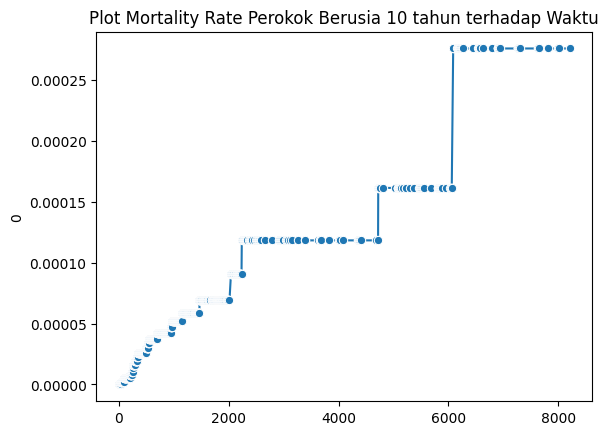

In [ ]:
df_s = cumulative_mortality_rate_s
import seaborn as sns
import matplotlib.pyplot as plt

# Plot dengan seaborn
sns.lineplot(x=df_s.index, y=0, data=df_s, marker='o')
plt.title('Plot Mortality Rate Perokok Berusia 10 tahun terhadap Waktu')
plt.show()

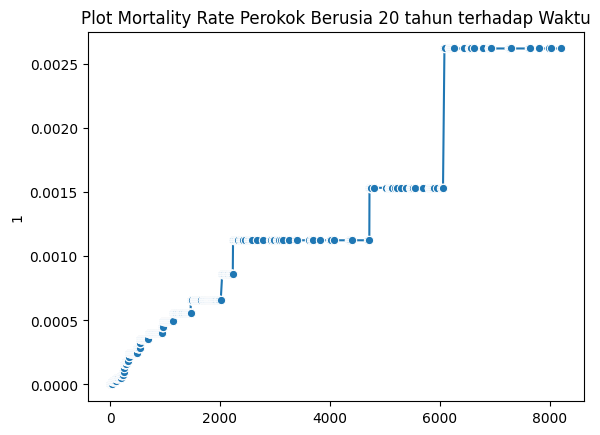

In [ ]:
sns.lineplot(x=df_s.index, y=1, data=df_s, marker='o')
plt.title('Plot Mortality Rate Perokok Berusia 20 tahun terhadap Waktu')
plt.show()

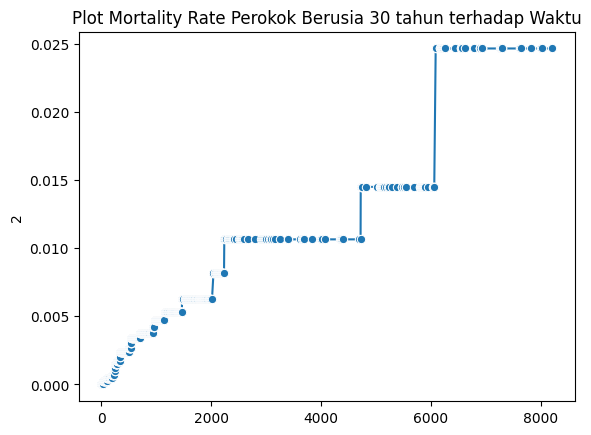

In [ ]:
sns.lineplot(x=df_s.index, y=2, data=df_s, marker='o')
plt.title('Plot Mortality Rate Perokok Berusia 30 tahun terhadap Waktu')
plt.show()

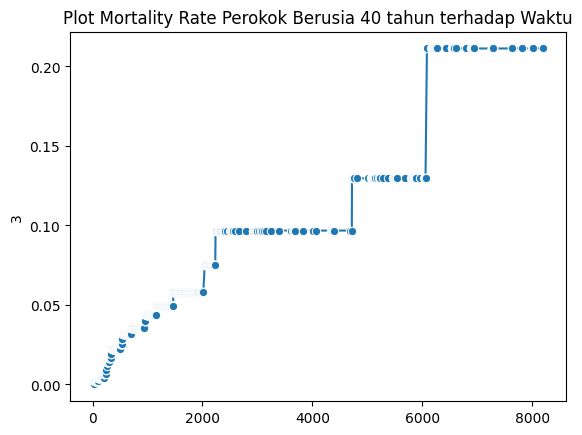

In [ ]:
sns.lineplot(x=df_s.index, y=3, data=df_s, marker='o')
plt.title('Plot Mortality Rate Perokok Berusia 40 tahun terhadap Waktu')
plt.show()

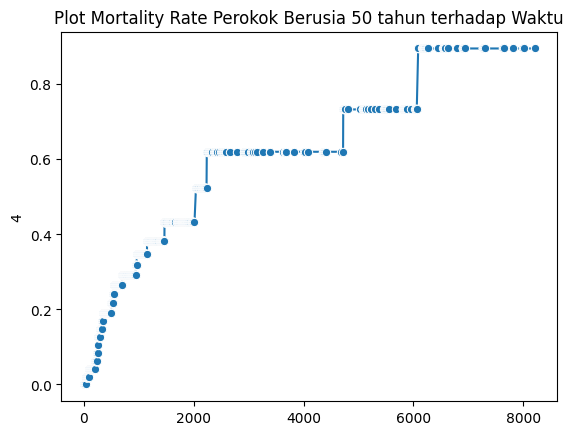

In [ ]:
sns.lineplot(x=df_s.index, y=4, data=df_s, marker='o')
plt.title('Plot Mortality Rate Perokok Berusia 50 tahun terhadap Waktu')
plt.show()

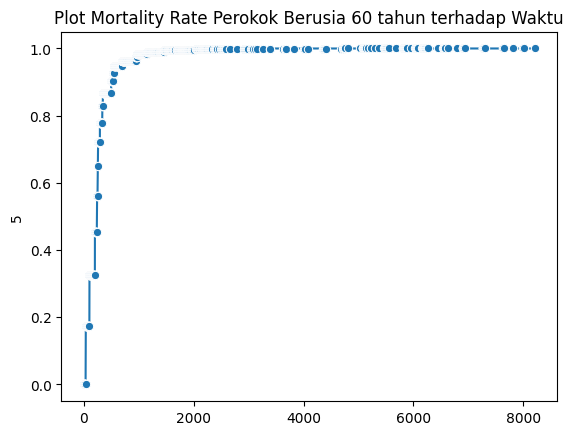

In [ ]:
sns.lineplot(x=df_s.index, y=5, data=df_s, marker='o')
plt.title('Plot Mortality Rate Perokok Berusia 60 tahun terhadap Waktu')
plt.show()

##**PLOT MORTALITY RATE NON PEROKOK**

In [ ]:
df_ns = cumulative_mortality_rate_ns

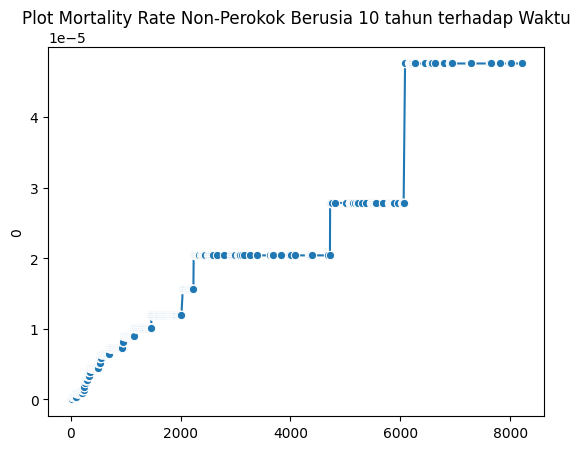

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=df_ns.index, y=0, data=df_ns, marker='o')
plt.title('Plot Mortality Rate Non-Perokok Berusia 10 tahun terhadap Waktu')
plt.show()

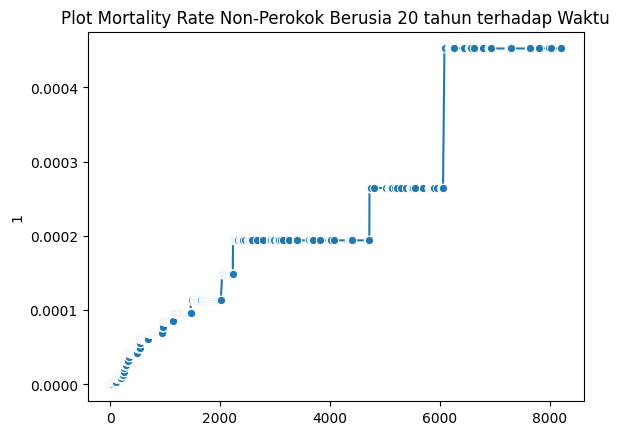

In [ ]:
sns.lineplot(x=df_ns.index, y=1, data=df_ns, marker='o')
plt.title('Plot Mortality Rate Non-Perokok Berusia 20 tahun terhadap Waktu')
plt.show()

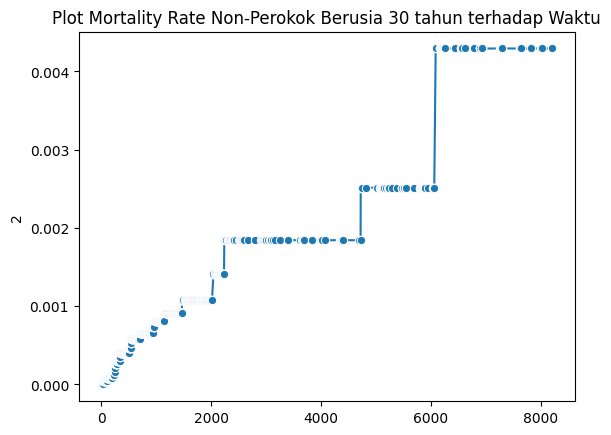

In [ ]:
sns.lineplot(x=df_ns.index, y=2, data=df_ns, marker='o')
plt.title('Plot Mortality Rate Non-Perokok Berusia 30 tahun terhadap Waktu')
plt.show()

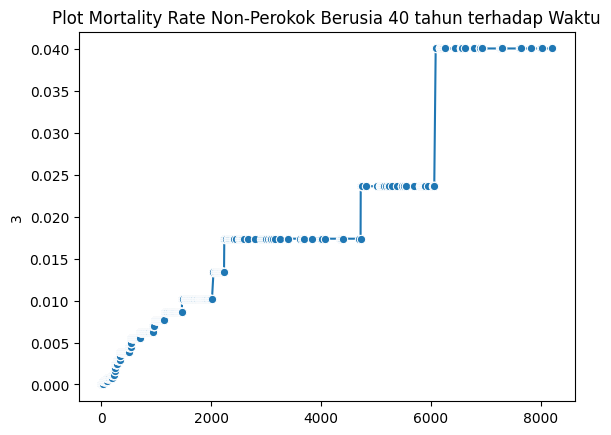

In [ ]:
sns.lineplot(x=df_ns.index, y=3, data=df_ns, marker='o')
plt.title('Plot Mortality Rate Non-Perokok Berusia 40 tahun terhadap Waktu')
plt.show()

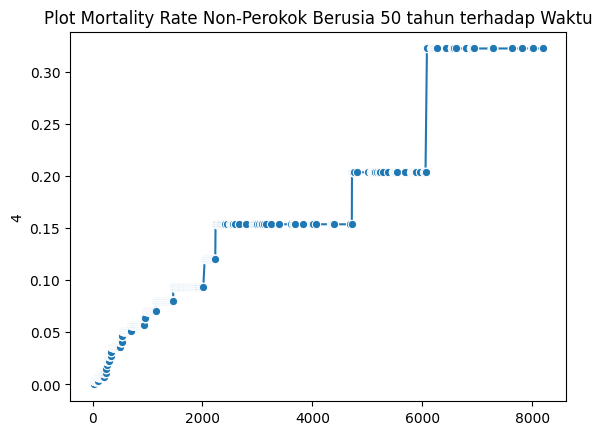

In [ ]:
sns.lineplot(x=df_ns.index, y=4, data=df_ns, marker='o')
plt.title('Plot Mortality Rate Non-Perokok Berusia 50 tahun terhadap Waktu')
plt.show()

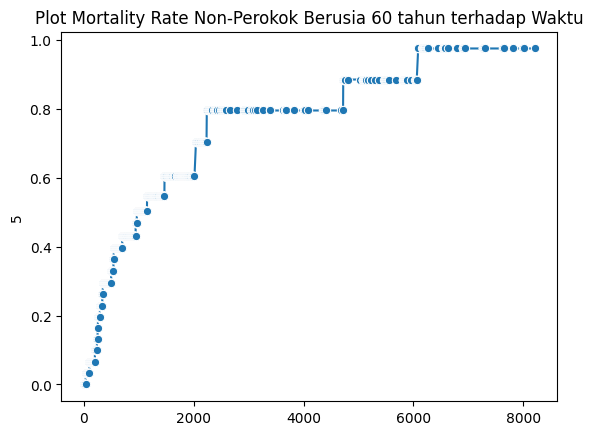

In [ ]:
sns.lineplot(x=df_ns.index, y=5, data=df_ns, marker='o')
plt.title('Plot Mortality Rate Non-Perokok Berusia 60 tahun terhadap Waktu')
plt.show()

In [ ]:
# Mortality rate untuk Non Perokok
time_points = [41,42,43,44,45]
survival_function_40ns = cph.predict_survival_function(pd.DataFrame({'joinage': time_points, 'smokingstatus': [0] * len(time_points)}))

In [ ]:
cumulative_mortality_rate_40ns = 1 - survival_function_40ns
cumulative_mortality_rate_40ns[1800:1900]

,0,1,2,3,4
1800.000000,0.012780,0.015983,0.019979,0.024963,0.031169
1805.000000,0.012780,0.015983,0.019979,0.024963,0.031169
1807.000000,0.012780,0.015983,0.019979,0.024963,0.031169
1811.000000,0.012780,0.015983,0.019979,0.024963,0.031169
1813.000000,0.012780,0.015983,0.019979,0.024963,0.031169
1820.000000,0.012780,0.015983,0.019979,0.024963,0.031169
1825.000000,0.012780,0.015983,0.019979,0.024963,0.031169
1827.000000,0.012780,0.015983,0.019979,0.024963,0.031169
1828.000000,0.012780,0.015983,0.019979,0.024963,0.031169
1832.000000,0.012780,0.015983,0.019979,0.024963,0.031169


In [ ]:
# Mortality rate untuk Perokok
time_points = [41,42,43,44,45]
survival_function_40s = cph.predict_survival_function(pd.DataFrame({'joinage': time_points, 'smokingstatus': [1] * len(time_points)}))

In [ ]:
cumulative_mortality_rate_40s = 1 - survival_function_40s
cumulative_mortality_rate_40s[1820:1830]

,0,1,2,3,4
1820.000000,0.071908,0.089239,0.110491,0.136413,0.167821
1825.000000,0.071908,0.089239,0.110491,0.136413,0.167821
1827.000000,0.071908,0.089239,0.110491,0.136413,0.167821
1828.000000,0.071908,0.089239,0.110491,0.136413,0.167821


In [ ]:
# Mortality rate untuk Perokok
time_points = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60
]
survival_function_40s = cph.predict_survival_function(pd.DataFrame({'joinage': time_points, 'smokingstatus': [1] * len(time_points)}))

In [ ]:
cumulative_mortality_rate_40s = 1 - survival_function_40s
mortalityratesmoker=cumulative_mortality_rate_40s[1824:1826]

In [ ]:
mortalityratesmoker

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
1825.000000,0.000069,0.000087,0.000109,0.000136,0.000171,0.000214,0.000268,0.000335,0.000420,0.000526,...,0.508141,0.588849,0.671527,0.752046,0.825662,0.887857,0.935472,0.967708,0.986433,0.995421


In [ ]:
# Mortality rate untuk Non Perokok
time_points = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60
]
survival_function_40ns = cph.predict_survival_function(pd.DataFrame({'joinage': time_points, 'smokingstatus': [0] * len(time_points)}))

In [ ]:
cumulative_mortality_rate_40ns = 1 - survival_function_40ns
mortalityratenonsmoker=cumulative_mortality_rate_40ns[1824:1826]

In [ ]:
mortalityratenonsmoker

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
1825.000000,0.000012,0.000015,0.000019,0.000023,0.000029,0.000037,0.000046,0.000058,0.000072,0.000091,...,0.115121,0.142041,0.174607,0.213661,0.259984,0.314177,0.376495,0.446628,0.523454,0.604819


In [ ]:
mortalityrate = pd.merge(mortalityratesmoker, mortalityratenonsmoker, left_index=True, right_index=True, how='inner')

In [ ]:
mortalityrate

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y
1825.000000,0.000069,0.000087,0.000109,0.000136,0.000171,0.000214,0.000268,0.000335,0.000420,0.000526,...,0.115121,0.142041,0.174607,0.213661,0.259984,0.314177,0.376495,0.446628,0.523454,0.604819


In [ ]:
nama_file_excel = 'mortalityrate.xlsx'
mortalityrate.to_excel(nama_file_excel, index=False)